In [68]:
import pandas as pd
import numpy as np
import seaborn as sns

In [69]:
df = pd.read_csv('HR_comma_sep.csv')
df

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.57,2,151,3,0,0.40,1,0,support,low
14995,0.48,2,160,3,0,0.37,1,0,support,low
14996,0.53,2,143,3,0,0.37,1,0,support,low
14997,0.96,6,280,4,0,0.11,1,0,support,low


In [70]:
df.shape

(14999, 10)

In [71]:
df.dtypes

last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
satisfaction_level       float64
left                       int64
promotion_last_5years      int64
role                      object
salary                    object
dtype: object

In [72]:
left_rate = df.left.value_counts()/len(df)
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

In [73]:
corr_mat=df.corr()
corr_mat

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years
last_evaluation,1.000000,0.349333,0.339742,0.131591,-0.007104,0.105021,0.006567,-0.008684
number_project,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.142970,0.023787,-0.006064
average_montly_hours,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.020048,0.071287,-0.003544
time_spend_company,0.131591,0.196786,0.127755,1.000000,0.002120,-0.100866,0.144822,0.067433
Work_accident,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.058697,-0.154622,0.039245
satisfaction_level,0.105021,-0.142970,-0.020048,-0.100866,0.058697,1.000000,-0.388375,0.025605
left,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.388375,1.000000,-0.061788
promotion_last_5years,-0.008684,-0.006064,-0.003544,0.067433,0.039245,0.025605,-0.061788,1.000000


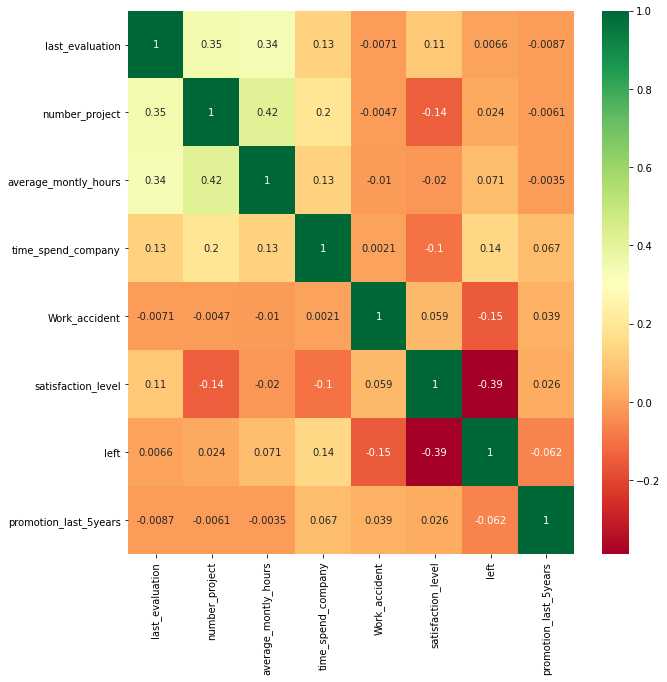

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
top_corr_features =corr_mat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g

In [75]:
df['role']=df['role'].astype('category').cat.codes
df['salary']=df['salary'].astype('category').cat.codes
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,7,1
1,0.86,5,262,6,0,0.80,1,0,7,2
2,0.88,7,272,4,0,0.11,1,0,7,2
3,0.87,5,223,5,0,0.72,1,0,7,1
4,0.52,2,159,3,0,0.37,1,0,7,1


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
Y=df['left']
X=df.drop('left',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [83]:
#using logistic Regression
from sklearn import preprocessing
reg = LogisticRegression(solver='lbfgs',max_iter = 15000)
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
print ('logistic regression accuracy score:',accuracy_score(y_test,y_predict))

logistic regression accuracy score: 0.764


In [89]:
#using DecisionTree
clf=DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
print('Decision Tree accuracy score',accuracy_score(y_test,y_predict))

Decision Tree accuracy score 0.9802666666666666


In [90]:
#using Random Forest 
Rtree=RandomForestClassifier()
Rtree.fit(x_train,y_train)
y_predict=Rtree.predict(x_test)
# print(x_test,y_predict)
print('Random forest accuracy score',accuracy_score(y_test,y_predict))

Random forest accuracy score 0.9925333333333334


In [91]:
# Random Forest accuracy is high
#Finding important features for leaving the job
important_features=Rtree.feature_importances_
indices=np.argsort(important_features)[::-1]
for i in range(X.shape[1]):
     print ("{}: {} {}".format(i+1,X.columns[indices[i]],importances[indices[i]]))

1: satisfaction_level 0.3284295731745903
2: time_spend_company 0.18251295188575778
3: number_project 0.18342311137288583
4: average_montly_hours 0.15672322650246145
5: last_evaluation 0.12158137817937986
6: role 0.012235149181694256
7: salary 0.007775716472462724
8: Work_accident 0.006039156864777042
9: promotion_last_5years 0.0012797363659908306


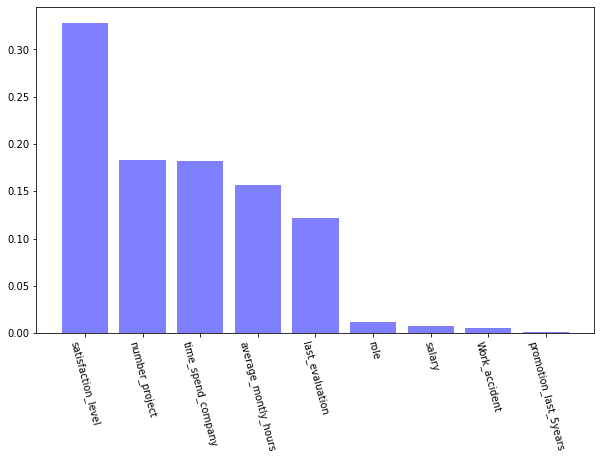

In [67]:
plt.figure(figsize=(10,6));
plt.bar(range(len(indices)),important_features[indices],color='blue',alpha=0.5,tick_label=X.columns[indices]);
plt.xticks(rotation='-75');